# Probability distribution problems

## Binomial distribution

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment; for example, when you flip a coin, it can be either head or tails.

In [1]:
from scipy.stats import binom

# Define all the probability functions related to this distribution

def dbinom(x, size, prob = 0.5):
    """
    Calculates the point estimate of the binomial distribution
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calculates the cumulative of the binomial distribution
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calculates the quantile function from the binomial distribution
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Generates random variables from the binomial distribution
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [2]:
# Binomial(10, 0.2) distribution, where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


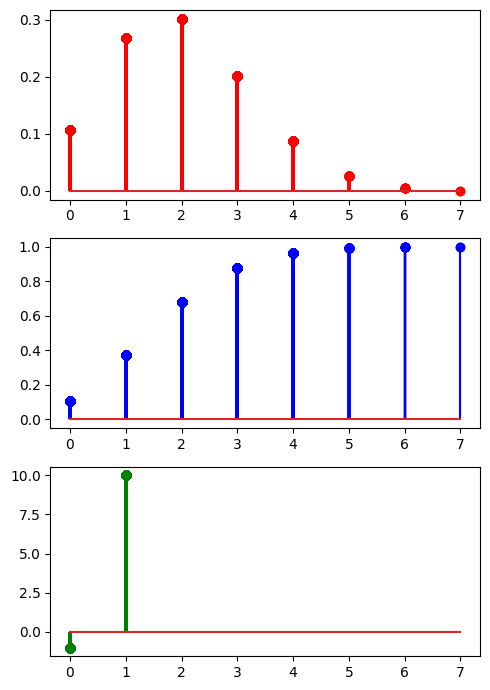

In [3]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Exercise 1

Write the above functions but for both normal and uniform distributions.

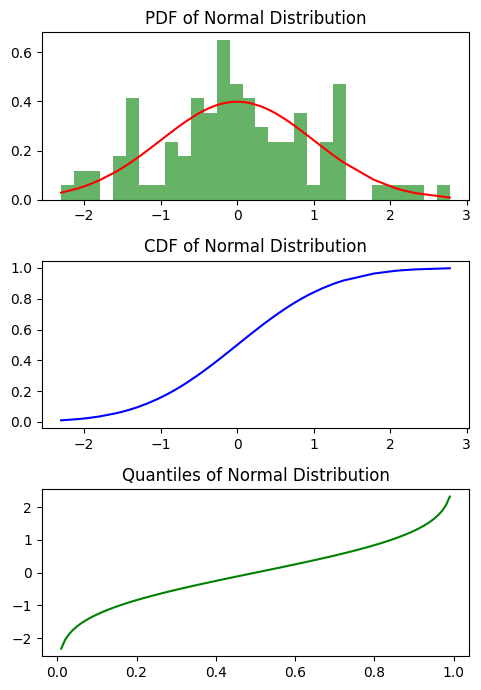

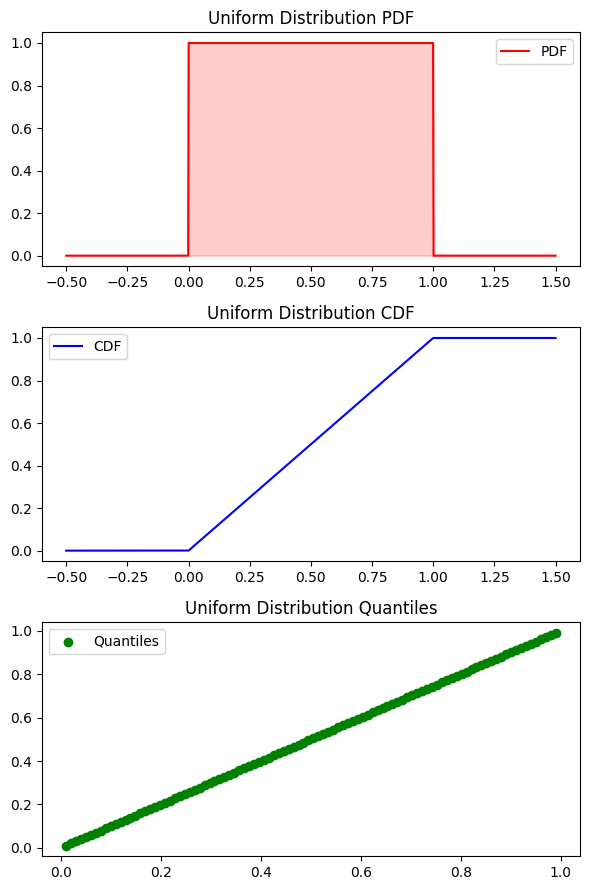

In [ ]:
from scipy.stats import norm, uniform
import numpy as np
import matplotlib.pyplot as plt

# Normal Distribution
def dnorm(x, mean=0, sd=1):
    result = norm.pdf(x, loc=mean, scale=sd)
    return result

def pnorm(q, mean=0, sd=1):
    result = norm.cdf(q, loc=mean, scale=sd)
    return result

def qnorm(p, mean=0, sd=1):
    result = norm.ppf(p, loc=mean, scale=sd)
    return result

def rnorm(n, mean=0, sd=1):
    result = norm.rvs(loc=mean, scale=sd, size=n)
    return result


mean = 0
sd = 1
normdata = rnorm(100, mean=mean, sd=sd)

pdf = dnorm(normdata, mean=mean, sd=sd)
cdf = pnorm(normdata, mean=mean, sd=sd)
quantiles = qnorm(np.linspace(0.01, 0.99, len(normdata)), mean=mean, sd=sd)

fig, axis = plt.subplots(3, 1, figsize=(5, 7))

axis[0].hist(normdata, bins=30, density=True, alpha=0.6, color='g')
axis[0].plot(np.sort(normdata), pdf[np.argsort(normdata)], 'r-')
axis[0].set_title("PDF of Normal Distribution")

axis[1].plot(np.sort(normdata), cdf[np.argsort(normdata)], 'b-')
axis[1].set_title("CDF of Normal Distribution")

axis[2].plot(np.linspace(0.01, 0.99, len(normdata)), quantiles, 'g-')
axis[2].set_title("Quantiles of Normal Distribution")

plt.tight_layout()
plt.show()


# Uniform Distribution
def dunif(x, min=0, max=1):
    result = uniform.pdf(x, loc=min, scale=max-min)
    return result

def punif(q, min=0, max=1):
    result = uniform.cdf(q, loc=min, scale=max-min)
    return result

def qunif(p, min=0, max=1):
    result = uniform.ppf(p, loc=min, scale=max-min)
    return result

def runif(n, min=0, max=1):
    result = uniform.rvs(loc=min, scale=max-min, size=n)
    return result


a = 0  
b = 1  

x = np.linspace(a - 0.5, b + 0.5, 1000)
pdf = dunif(x, min=a, max=b)
cdf = punif(x, min=a, max=b)
quantiles = qunif(np.linspace(0.01, 0.99, 100), min=a, max=b)

fig, axis = plt.subplots(3, 1, figsize=(6, 9))

axis[0].plot(x, pdf, 'r-', label='PDF')
axis[0].set_title('Uniform Distribution PDF')
axis[0].fill_between(x, 0, pdf, color='red', alpha=0.2)
axis[0].legend()

axis[1].plot(x, cdf, 'b-', label='CDF')
axis[1].set_title('Uniform Distribution CDF')
axis[1].legend()

axis[2].scatter(np.linspace(0.01, 0.99, 100), quantiles, color='g', label='Quantiles')
axis[2].set_title('Uniform Distribution Quantiles')
axis[2].legend()

plt.tight_layout()
plt.show()
